<a href="https://colab.research.google.com/github/Megha0222/sum/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [347]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn import metrics

In [350]:
df=pd.read_csv("/content/erpfcst_1993-2015.wk3.csv")

In [351]:
df.head()
a=range(1,333)
b=range(1,773)

In [352]:
df.drop(['date'],axis=1)

,observed,forecast
0,0.3287,0.973627
1,0.0845,1.750285
2,0.0000,1.542386
3,0.0000,0.930358
4,0.3025,1.061117
...,...,...
1099,0.0000,0.381571
1100,0.0000,0.584191
1101,0.0000,0.430774
1102,0.0000,0.248147


In [353]:
X=np.asanyarray(df[['observed']]).astype('int')
y=np.asanyarray(df['forecast']).astype('int')
print(X.shape)
print(y.shape)

(1104, 1)
(1104,)


In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [355]:
len(X_train)


772

LINEAR REGRESSION

In [356]:
#LINEAR REGRESSION
LR = LinearRegression()
LR.fit(X_train,y_train)

LinearRegression()

In [357]:
LR.score(X, y)   #COEFFICIENT
LR.coef_

array([0.18949267])

In [358]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)

In [359]:
LR_predict = LR.predict(X_test) #Predictions on Testing data
print(LR_predict)

[0.51717836 0.51717836 0.70667103 0.51717836 0.70667103 2.79109037
 0.51717836 0.51717836 0.51717836 2.98058304 0.51717836 0.51717836
 1.4646417  0.51717836 0.51717836 0.51717836 0.51717836 0.8961637
 0.51717836 0.51717836 0.51717836 0.51717836 1.4646417  0.51717836
 1.4646417  0.8961637  0.51717836 0.51717836 0.70667103 0.51717836
 1.08565637 0.51717836 0.51717836 5.82297305 0.51717836 0.51717836
 0.8961637  0.51717836 1.08565637 0.8961637  0.51717836 0.51717836
 0.51717836 0.70667103 0.51717836 1.27514903 0.51717836 0.51717836
 0.70667103 0.51717836 0.51717836 0.51717836 0.51717836 0.51717836
 0.51717836 1.08565637 1.27514903 0.70667103 0.51717836 2.41210504
 0.51717836 0.51717836 0.51717836 1.27514903 0.51717836 0.70667103
 0.51717836 0.51717836 1.65413437 0.70667103 0.51717836 0.51717836
 0.51717836 0.70667103 0.51717836 0.51717836 0.51717836 0.8961637
 0.51717836 0.51717836 0.51717836 0.51717836 0.8961637  3.92804638
 0.51717836 2.0331197  0.51717836 1.27514903 0.51717836 0.517178

In [360]:
# np.savetxt('/content/sample_data.csv',X_test ,delimiter=',')

In [361]:
# model accuracy (ncmrwf forecast vs Bias Corrected (LM) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 1.0177382558176158
MSE: 3.027084021169559
RMSE: 1.7398517239033788

-------Train Data--------
MAE: 1.0428888874973012
MSE: 3.288577778330384
RMSE: 1.8134436242492855

-----Training Accuracy-------
13.100000000000001
-----Testing Accuracy--------
5.7


In [362]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.6686746987951808
MSE: 15.91566265060241
RMSE: 3.9894439024258017
-------observation vs model forecast --------
MAE: 1.6028784831608784
MSE: 11.169636705105573
RMSE: 3.3421006425757995


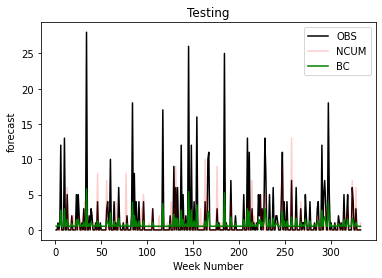

In [363]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('LM.png')


plt.show()

Text(0.5, 1.0, 'Testing')

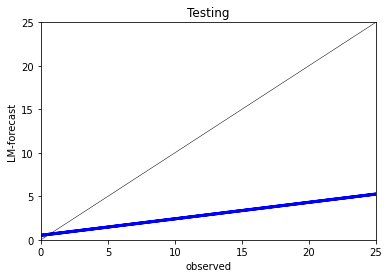

In [364]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('LM-forecast')
plt.title('Testing')


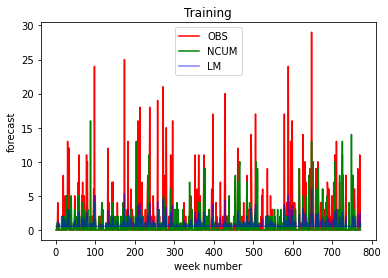

In [365]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Training')

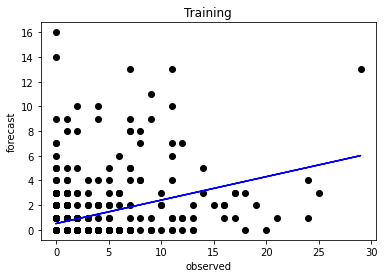

In [366]:

#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Testing')

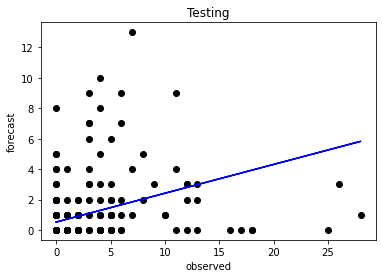

In [367]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

SUPPORT VECTOR MACHINE CODE


In [368]:
#SUPPORT VECTOR CLASSIFIER
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 

SVC()

In [369]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)

In [370]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))


-------observation vs ncmrwf forecast--------
MAE: 1.6686746987951808
MSE: 15.91566265060241
RMSE: 3.9894439024258017
-------observation vs model forecast --------
MAE: 1.677710843373494
MSE: 16.05722891566265
RMSE: 4.00714722909736


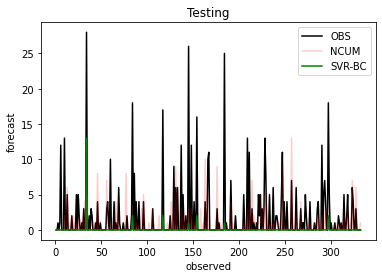

In [371]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "SVR-BC")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('SVR.png')

plt.show()

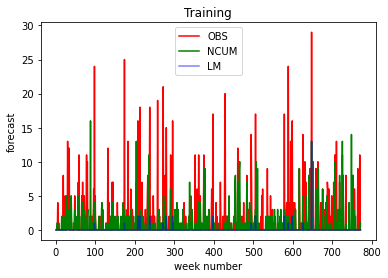

In [372]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()


Text(0.5, 1.0, 'Testing')

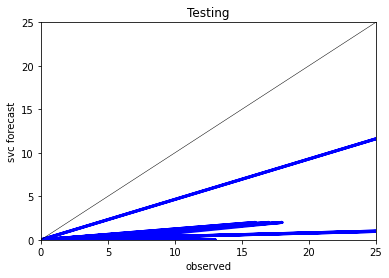

In [373]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('svc forecast')
plt.title('Testing')

Text(0.5, 1.0, 'Training')

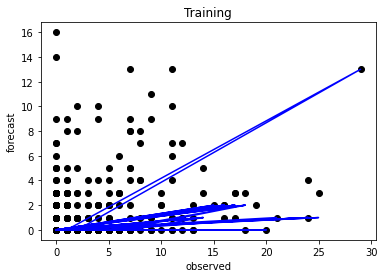

In [374]:
#plot outputs of training data
plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')



Text(0.5, 1.0, 'Testing')

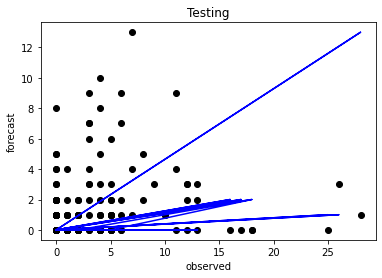

In [375]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')

RANDOM FOREST CLASSIFIER

In [376]:
#RANDOM FOREST
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)

In [377]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)

In [378]:
random_forest_model_predict = random_forest_model.predict(X_test) #Predictions on Testing data
print(random_forest_model_predict)

[0.42147068 0.42147068 1.05317321 0.42147068 1.05317321 2.382169
 0.42147068 0.42147068 0.42147068 1.50829119 0.42147068 0.42147068
 1.32534044 0.42147068 0.42147068 0.42147068 0.42147068 0.95306875
 0.42147068 0.42147068 0.42147068 0.42147068 1.32534044 0.42147068
 1.32534044 0.95306875 0.42147068 0.42147068 1.05317321 0.42147068
 0.90314615 0.42147068 0.42147068 3.6847836  0.42147068 0.42147068
 0.95306875 0.42147068 0.90314615 0.95306875 0.42147068 0.42147068
 0.42147068 1.05317321 0.42147068 1.70350593 0.42147068 0.42147068
 1.05317321 0.42147068 0.42147068 0.42147068 0.42147068 0.42147068
 0.42147068 0.90314615 1.70350593 1.05317321 0.42147068 2.56818834
 0.42147068 0.42147068 0.42147068 1.70350593 0.42147068 1.05317321
 0.42147068 0.42147068 1.43441034 1.05317321 0.42147068 0.42147068
 0.42147068 1.05317321 0.42147068 0.42147068 0.42147068 0.95306875
 0.42147068 0.42147068 0.42147068 0.42147068 0.95306875 2.10413345
 0.42147068 3.92866271 0.42147068 1.70350593 0.42147068 0.421470

In [379]:
# model accuracy (ncmrwf forecast vs Bias Corrected (RF) forecast)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 0.9458994671965555
MSE: 2.6429764476911464
RMSE: 1.625723361365994

-------Train Data--------
MAE: 0.9845672000027449
MSE: 3.042111656799653
RMSE: 1.7441650314117794

-----Training Accuracy-------
13.100000000000001
-----Testing Accuracy--------
5.7


In [380]:
print("-------observation vs ncmrwf forecast--------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test))
print('MSE:', metrics.mean_squared_error(X_test, y_test))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test)))

print("-------observation vs model forecast --------")
print('MAE:', metrics.mean_absolute_error(X_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(X_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(X_test, y_test_predict)))

-------observation vs ncmrwf forecast--------
MAE: 1.6686746987951808
MSE: 15.91566265060241
RMSE: 3.9894439024258017
-------observation vs model forecast --------
MAE: 1.5227923935391479
MSE: 12.237067110268114
RMSE: 3.4981519564290107


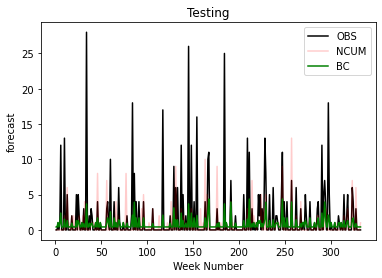

In [381]:
# Plot outputs testing
plt.plot(a, X_test, color="black", label = "OBS")
plt.plot(a, y_test, color="red", alpha=0.2, label = "NCUM")
plt.plot(a, y_test_predict, color="green",alpha=1, label = "BC")
plt.xlabel('Week Number')
plt.ylabel('forecast')
plt.title('Testing')
plt.legend()
plt.savefig('RF.png')
plt.show()

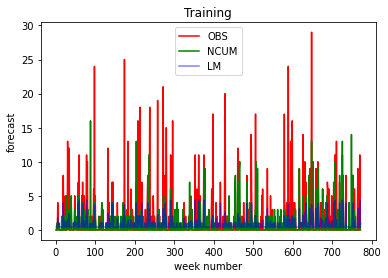

In [382]:
#plot outputs of training data
plt.plot(b, X_train, color="red",label="OBS")
plt.plot(b, y_train, color="green",alpha=1,label="NCUM")
plt.plot(b, y_train_predict, color="blue",alpha=0.5,label="LM")
plt.xlabel('week number')
plt.ylabel('forecast')
plt.title('Training')
plt.legend()

Text(0.5, 1.0, 'Testing')

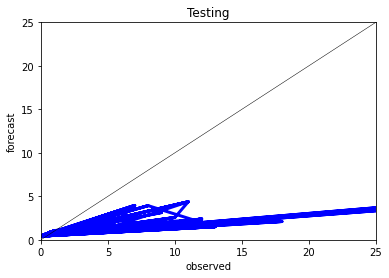

In [383]:
plt.plot(X_test, y_test_predict, color="blue", linewidth=3)
plt.xlim((0, 25)) # restricts x axis from 0 to 25
plt.ylim((0, 25)) # restricts x axis from 0 to 25
plt.plot([0, 25], [0, 25], color = "black", linewidth = 0.5) # plots line y = x
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Testing')


Text(0.5, 1.0, 'Training')

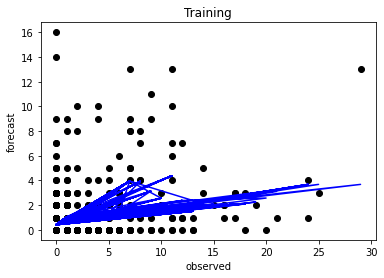

In [384]:
#plot outputs of training data

plt.scatter(X_train, y_train, color="black")
plt.plot(X_train, y_train_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('forecast')
plt.title('Training')


Text(0.5, 1.0, 'Training')

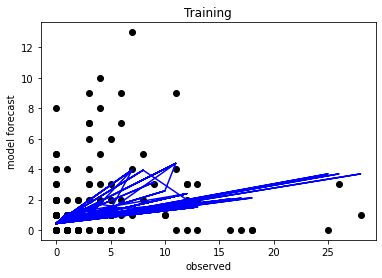

In [385]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_test_predict, color="blue")
plt.xlabel('observed')
plt.ylabel('model forecast')
plt.title('Training')